# Binary Classification of Heart Disease with Logistic Regression Model

#### Table Of Contents
* [Introduction](#first-bullet)
* [Dataset Exploration](#second-bullet)
* [Data Cleaning](#third-bullet)
* [Exploratory Analysis](#4th-bullet)
* [Predictor Analysis](#5th-bullet)
* [Splitting into Training and Test Sets](#6th-bullet)
* [Building the Model](#7th-bullet)
* [Evaluating Coefficients](#8th-bullet)
* [Test Dataset Model Evaluation](#9th-bullet)
* [Conclusion](#10th-bullet)

#### Introduction <a class="anchor" id="first-bullet"></a>

In this project we will use logistic regression modeling in Python on the Heart Disease Data Set from UCI Machine Learning Repository. In this dataset, there are patient characteristics, including age and chest pain, and our target - presence of heart disease.

We will create a logistic regression based binary classification ML model to help predict heart disease in individuals, and then we will evaluate our model.

The features in the dataset are:

* `age`: age in years
* `sex`: sex (1 = male; 0 = female)
* `cp`: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
* `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
* `chol`: serum cholesterol in mg/dl
* `fbs`: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
* `restecg`: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* `thalach`: maximum heart rate achieved
* `exang`: exercise induced angina (1 = yes; 0 = no)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)
* `ca`: number of major vessels (0-3) coloured by fluoroscopy
* `thal`: 3 = normal; 6 = fixed defect; 7 = reversible defect
* `present`: diagnosis of heart disease (angiographic disease status) (0 = no; 1 = yes)

#### Dataset Exploration <a class="anchor" id="second-bullet"></a>

In [2]:
#Import libraries
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
#Read in CSV file
heart = pd.read_csv("D:/DataQuest/heart_disease.csv")

In [4]:
#Check first 5 rows
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
#Dataset Info
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


There are a total of 302 rows and 15 columns. At a glance, there are no null values. The Unnamed:0 column is not needed, and will have to be removed before modelling. Oldpeak is float datatype. ca and thal are str objects, and the rest are integer datatypes.

In [6]:
#Overview of all the columns
headers = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','present']
for x in headers:
    print(heart[x].value_counts())

age
58    19
57    17
54    16
59    14
52    13
60    12
51    12
56    11
62    11
44    11
64    10
41    10
67     9
63     9
42     8
43     8
45     8
53     8
55     8
61     8
65     8
50     7
66     7
48     7
46     7
47     5
49     5
70     4
68     4
35     4
39     4
69     3
71     3
40     3
34     2
37     2
38     2
29     1
77     1
74     1
76     1
Name: count, dtype: int64
sex
1    206
0     97
Name: count, dtype: int64
cp
4    144
3     86
2     50
1     23
Name: count, dtype: int64
trestbps
120    37
130    36
140    32
110    19
150    17
138    12
128    12
160    11
125    11
112     9
132     8
118     7
124     6
108     6
135     6
152     5
134     5
145     5
100     4
170     4
122     4
126     3
136     3
115     3
180     3
142     3
105     3
102     2
146     2
144     2
148     2
178     2
94      2
165     1
123     1
114     1
154     1
156     1
106     1
155     1
172     1
200     1
101     1
129     1
192     1
158     1
104     1
174     1

thal and ca have ? values. We will have to look into this further.

#### Data Cleaning <a class="anchor" id="third-bullet"></a>

In [7]:
#Investigate thal column
heart[heart['thal']=='?']

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
87,88,53,0,3,128,216,0,2,115,0,0.0,1,0.0,?,0
266,267,52,1,4,128,204,1,0,156,1,1.0,2,0.0,?,1


In [8]:
#Investigate ca column
heart[heart['ca']=='?']

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
166,167,52,1,3,138,223,0,0,169,0,0.0,1,?,3.0,0
192,193,43,1,4,132,247,1,2,143,1,0.1,2,?,7.0,1
287,288,58,1,2,125,220,0,0,144,0,0.4,2,?,7.0,0
302,303,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


We will drop these 6 rows from our data set as I am unsure how the predictors will impact the target variable. I may consider substituting in values from rows with matching features with high correlation to thal / ca. However, given our sample is about 300, I am worried this may impact our model artificially.

For sake of simplicity and logistic regression modelling practice, we will simply drop these rows. We will also drop the unnamed column.

In [9]:
#Drop rows
heart_cleaned = heart.drop([87, 166, 192, 266, 287, 302])

#Drop Unnamed Column
heart_cleaned = heart_cleaned.drop('Unnamed: 0', axis=1)

#### Exploratory Analysis <a class="anchor" id="4th-bullet"></a>

In [10]:
heart_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  present   297 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 34.8+ KB


In [11]:
#Descriptive Analysis of the numeric variables
heart_cleaned.describe()[['age','trestbps','thalach','chol']]

,age,trestbps,thalach,chol
count,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,149.599327,247.350168
std,9.049736,17.762806,22.941562,51.997583
min,29.000000,94.000000,71.000000,126.000000
25%,48.000000,120.000000,133.000000,211.000000
50%,56.000000,130.000000,153.000000,243.000000
75%,61.000000,140.000000,166.000000,276.000000
max,77.000000,200.000000,202.000000,564.000000


Average age is 54 years old, with median at 56. Minimum age 29 and maximum age 77.

Resting blood pressure average at 131, with median at 130. Minimum at 94, maximum at 200.

Maximum heart rate average at 149, median at 153. Minimum at 71, maximum, 202.

Cholesterol average at 247, median at 243. Minimum, 126; maximum, 564.

Next, let us look at the categorical variables.

In [12]:
heart_cleaned[['sex']].value_counts()

sex
1      201
0       96
Name: count, dtype: int64

In [13]:
heart_cleaned[['cp']].value_counts()

cp
4     142
3      83
2      49
1      23
Name: count, dtype: int64

In [14]:
heart_cleaned[['fbs']].value_counts()

fbs
0      254
1       43
Name: count, dtype: int64

In [15]:
heart_cleaned[['restecg']].value_counts()

restecg
0          147
2          146
1            4
Name: count, dtype: int64

In [16]:
heart_cleaned[['exang']].value_counts()

exang
0        200
1         97
Name: count, dtype: int64

In [17]:
heart_cleaned[['oldpeak']].value_counts()

oldpeak
0.0        96
1.2        17
0.6        14
0.8        13
1.4        13
1.0        13
0.2        12
1.6        11
1.8        10
2.0         9
0.4         8
2.8         6
2.6         6
0.1         6
1.5         5
1.9         5
0.5         5
3.0         5
3.6         4
2.2         4
0.3         3
3.4         3
0.9         3
2.4         3
4.0         3
3.2         2
2.3         2
2.5         2
1.1         2
4.2         2
5.6         1
4.4         1
3.8         1
2.1         1
3.5         1
3.1         1
2.9         1
1.3         1
0.7         1
6.2         1
Name: count, dtype: int64

In [18]:
heart_cleaned[['slope']].value_counts()

slope
1        139
2        137
3         21
Name: count, dtype: int64

In [19]:
heart_cleaned[['ca']].value_counts()

ca 
0.0    174
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [20]:
heart_cleaned[['thal']].value_counts()

thal
3.0     164
7.0     115
6.0      18
Name: count, dtype: int64

In [21]:
heart_cleaned[['present']].value_counts()

present
0          160
1          137
Name: count, dtype: int64

All the variables look clean and ready.

#### Predictor Analysis <a class="anchor" id="5th-bullet"></a>

Let's take a look at the continuous numeric variables first - age, trestbps, chol, thalach

In [22]:
#Pearson's Correlation Matrix
heart_corr = heart_cleaned[['age','trestbps','chol','thalach','oldpeak','present']]
corr_matrix = heart_corr.corr()
abs(corr_matrix['present']).sort_values(ascending=False)

present     1.000000
oldpeak     0.424052
thalach     0.423817
age         0.227075
trestbps    0.153490
chol        0.080285
Name: present, dtype: float64

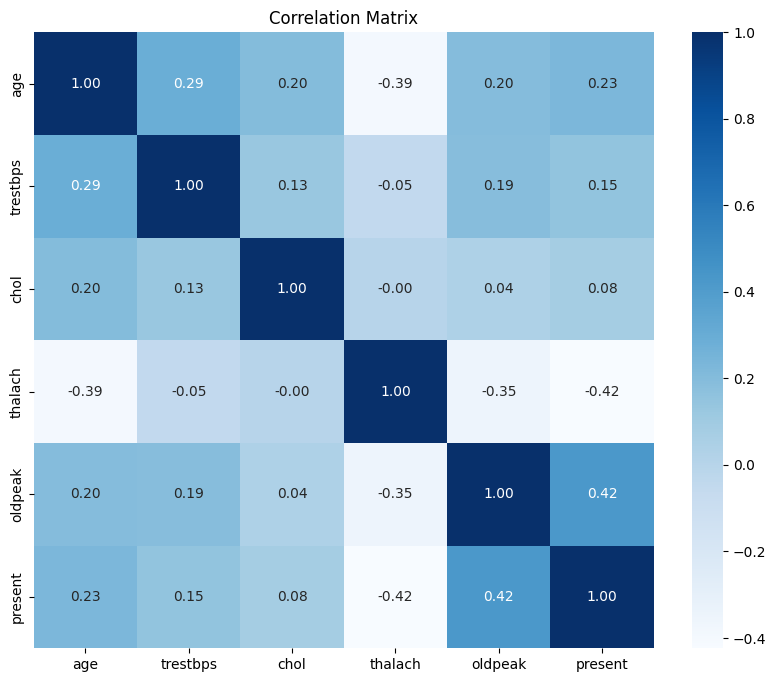

In [23]:
#Heatmap of Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

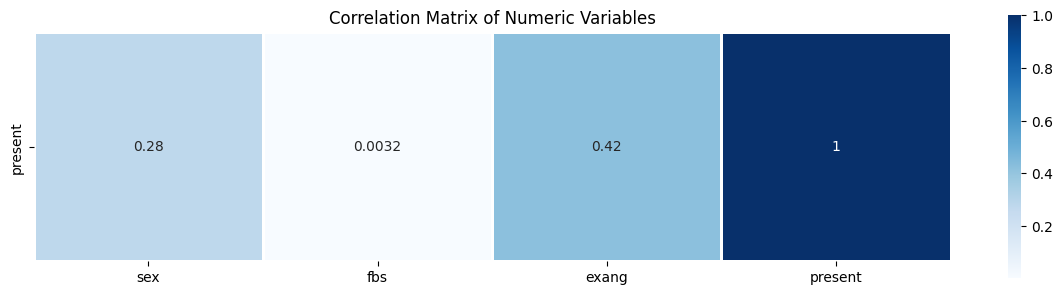

In [41]:
# Show the correlations of presence of heart disease specifically
fig, ax = plt.subplots(figsize=(12,3))

sns.heatmap(
    corr_matrix.loc[['present']],
    cmap='Blues',
    annot=True,
    ax=ax,
    linewidth = 1, 
    square =True,
)

plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

There is high positive correlation (>0.30) between presence of heart disease with oldpeak and negative correlation (<-0.30) with maximum heart rate achieved.

Let's look at binary categorical variables with Pearson's R too.

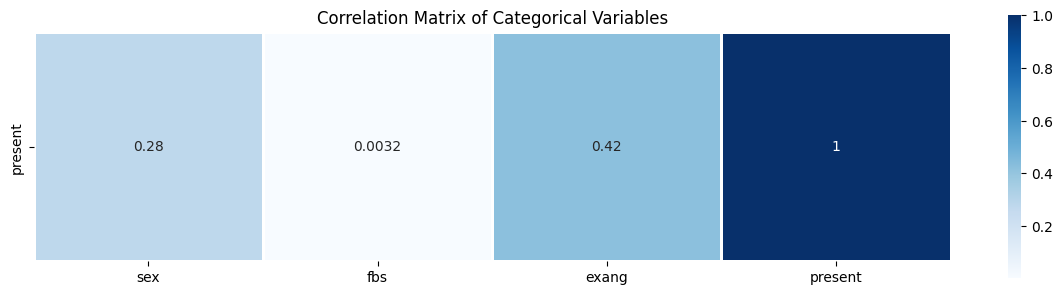

In [42]:
#Heatmap and correlation matrix of categorical variables
binary_var = heart_cleaned[['sex','fbs','exang','present']]
corr_matrix = binary_var.corr()
fig, ax = plt.subplots(figsize=(12,3))

sns.heatmap(
    corr_matrix.loc[['present']],
    cmap='Blues',
    annot=True,
    ax=ax,
    linewidth = 1, 
    square =True,
)

plt.title('Correlation Matrix of Categorical Variables')
plt.tight_layout()
plt.show()

Surprisingly fasting blood sugar does not a have a strong correlation with presence of heart disease even though it is well documented that high blood sugar (diabetes) leads to significant health issues including heart disease. This may be due to the fact that Pearson's correlation coefficient assumes linear relationship.

Let's have a closer look at the categorical variables.

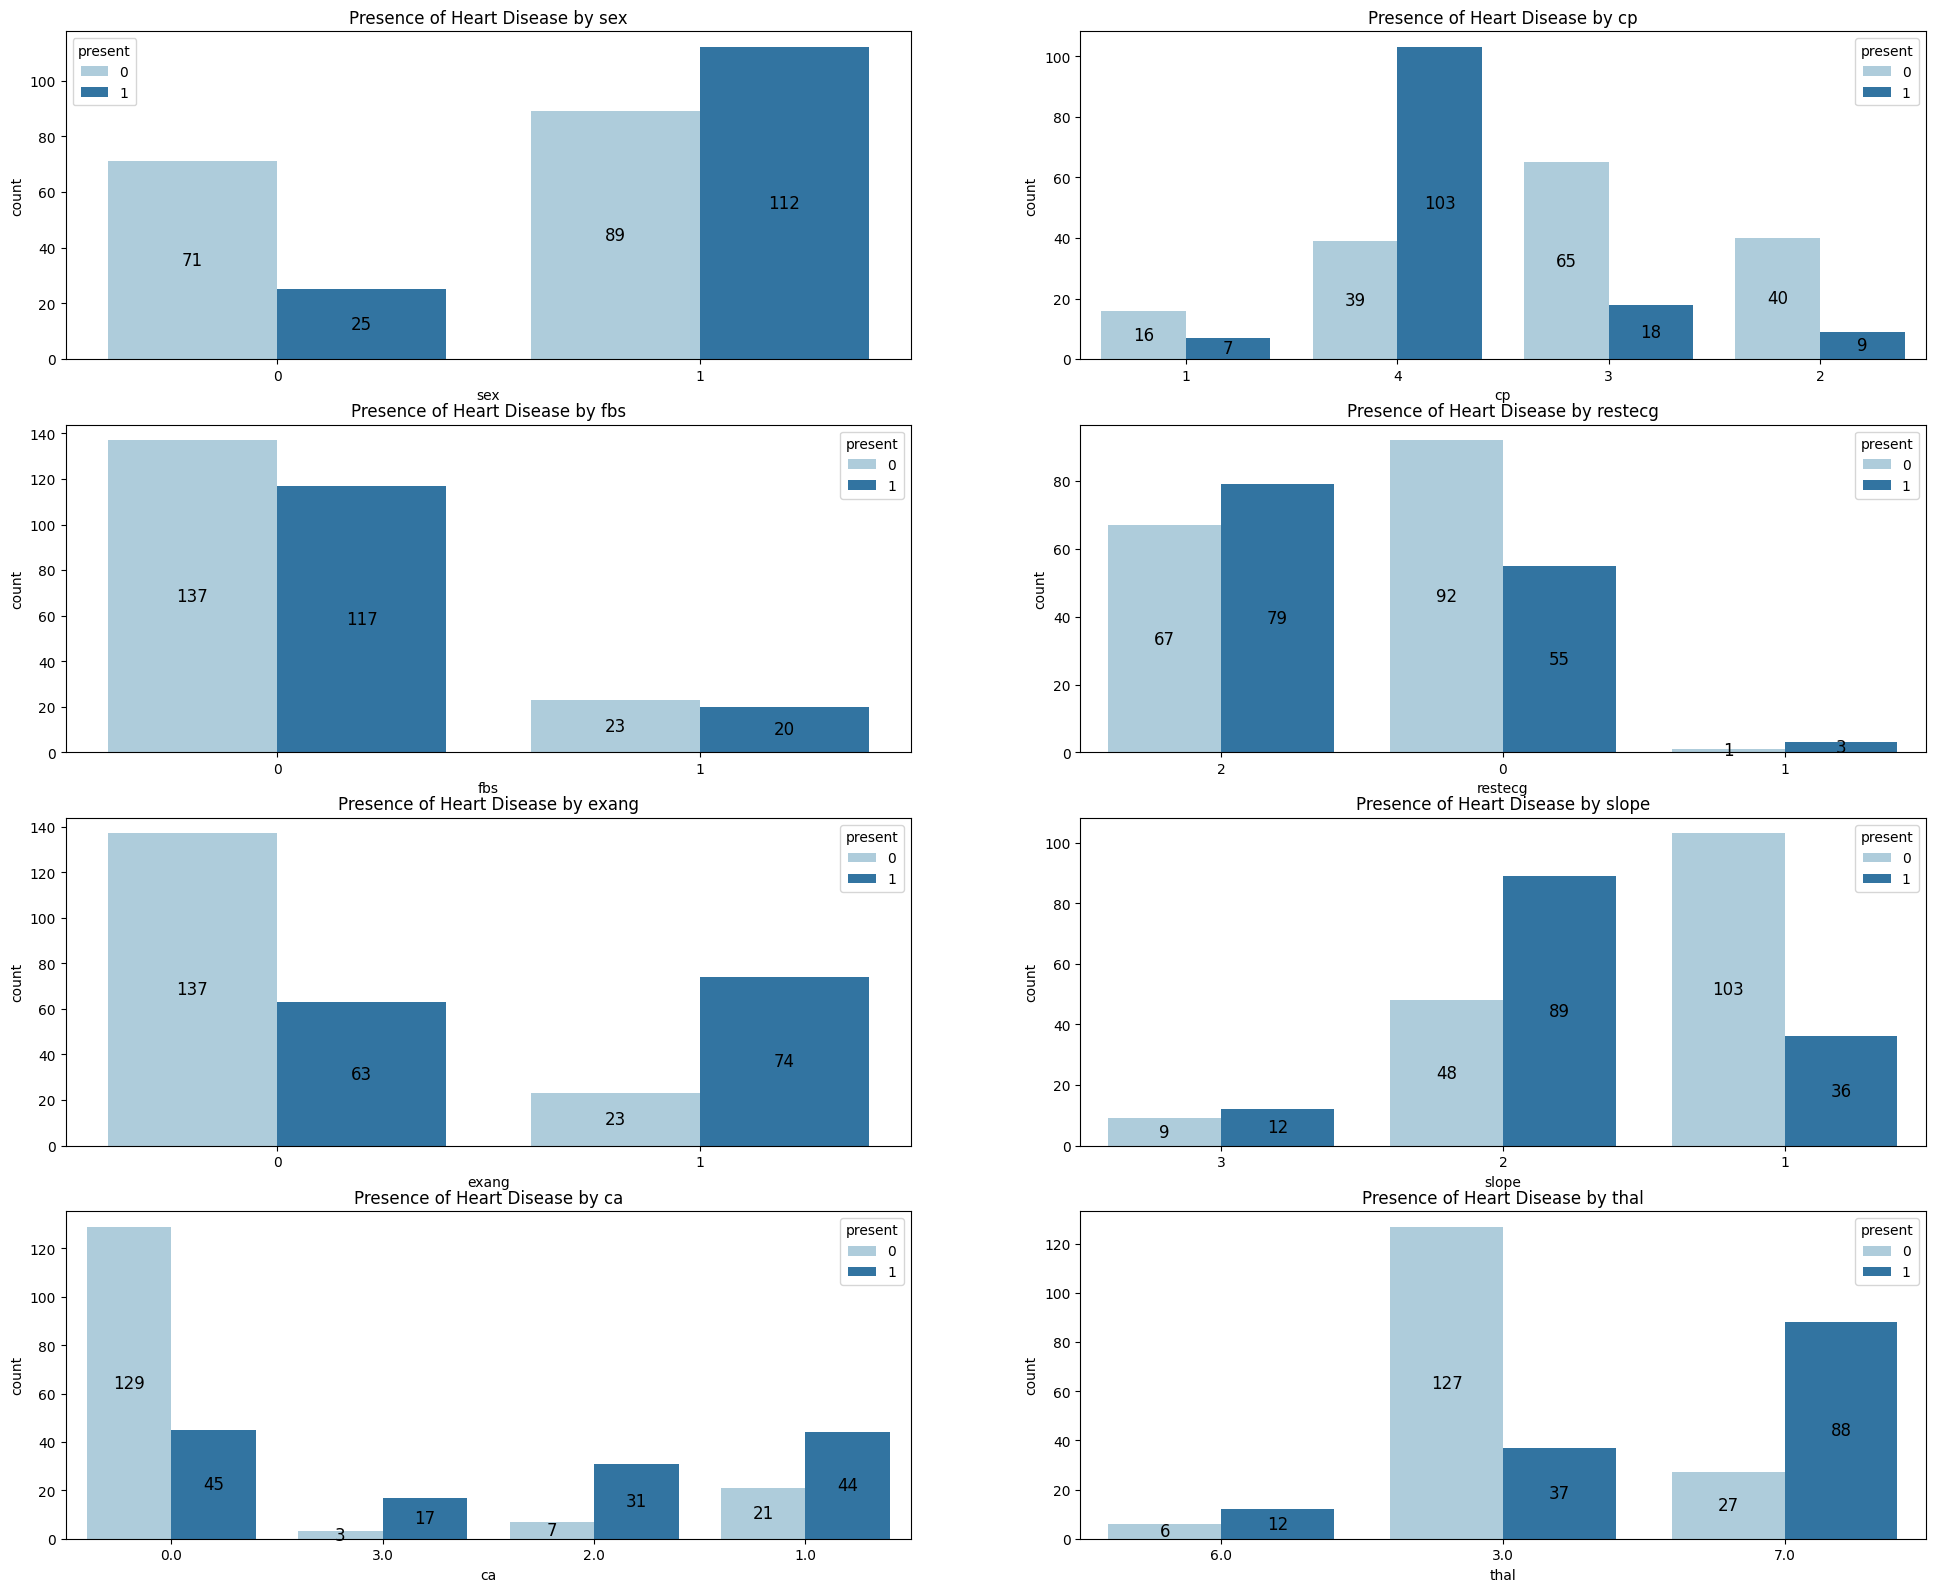

In [72]:
cat_variables = heart_cleaned[['sex','cp','fbs','restecg','exang','slope','ca','thal','present']]
fig = plt.figure(figsize=(24,40))
for i,x in enumerate(cat_variables):
    if x == 'present':
        continue
    else:
        ax = fig.add_subplot(8,2,i+1)
        sns.set_palette('Paired')
        sns.countplot(x=heart_cleaned[x],hue=heart_cleaned['present'])
        ax.set_title(f'Presence of Heart Disease by {x}')
        plt.xlabel(x)
        ax.xaxis.grid(False)
        #Add numeric labels to our bars
        for container in ax.containers:
            ax.bar_label(container, label_type="center", size =12)
plt.tight_layout
plt.show()

Gross overview of the graphs suggest that all the variables have an impact on presence of heart disease except fbs(fasting blood sugar) which shows relatively similar bars. We cannot be sure of the significance of impact but we will include them in our model.

Therefore, we have our predictors as below:

In [27]:
predictors = ['thalach','oldpeak','sex','cp','exang','fbs','restecg','slope','ca','thal']

Before we continue with our model, we need to convert our nominal variables into dummy variables.

In [73]:
#Dummy variable conversion
dummies = ['cp','restecg','slope','ca','thal']
heart_cleaned[dummies] = heart_cleaned[dummies].astype(str)
heart_dummy = pd.get_dummies(heart_cleaned, drop_first=True).astype(int)
new_predictors = heart_dummy.columns.drop('present')
new_predictors

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_2', 'cp_3', 'cp_4', 'restecg_1', 'restecg_2', 'slope_2', 'slope_3',
       'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

#### Splitting into Training and Test Sets <a class="anchor" id="6th-bullet"></a>

In [29]:
#Split data into predictors and target
X = heart_dummy.drop('present',axis=1)
y = heart_dummy['present']

We'll use the formula presented in Statistical Analysis and Data Mining: The ASA Data Science Journal to determine the size of our training and testing sets.

In [30]:
# Determines test size
p = len(predictors)
test_size = 1 / (np.sqrt(p) + 1)
print(f'{test_size=:.3f}')

test_size=0.240


The above step may not be necessary. Generally, test size 0.2-0.4 is sufficient depending on sample size. 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=512)

In [32]:
y_train.value_counts(normalize=True)

present
0    0.542222
1    0.457778
Name: proportion, dtype: float64

In [33]:
y_test.value_counts(normalize=True)

present
0    0.527778
1    0.472222
Name: proportion, dtype: float64

The distribution is similar. We can proceed with training our model after normalizing our data.

#### Building the Model <a class="anchor" id="7th-bullet"></a>

We will begin by normalizing our data set, so each predictor contributes equally to the model.
Then, we will instantiate our linear regression model and fit the model with our training dataset.

Lastly, we will test our model and calculate its accuracy.

In [34]:
#Normalize our data
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
#Build Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

#Test training set accuracy
training_accuracy = model.score(X_train, y_train)
training_accuracy

0.8977777777777778

Our accuracy is 90% which is really good. We can consider finding the best fit hyperparameters using gridsearchcv but I think 90% accuracy is really good for us to move on.

Let's proceed with checking model performance.

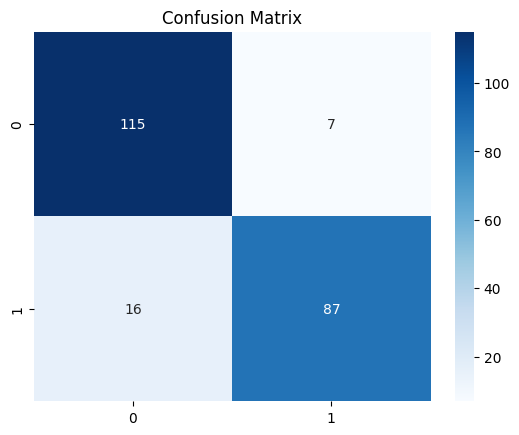

Sensitivity: 0.8447
Specificity: 0.9426
PPV: 0.9255
NPV: 0.8779


In [36]:
def plot_confusion_matrix(model, X, y):
    ''' Plots a confusion matrix.'''
    y_pred = model.predict(X)

    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, cmap=plt.colormaps.get_cmap('Blues'),fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate TP, TN, FP, and FN
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    PPV = TP / (TP + FP)
    NPV = TN / (TN + FN)

    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"PPV: {PPV:.4f}")
    print(f"NPV: {NPV:.4f}")


plot_confusion_matrix(model, X_train, y_train)

We can see from the confusion matrix that our model has a negative predictive value of 87.79%. This means if given that our model predicts the absence of heart disease, there is 87% of the time that there is no heart disease. The 13% of the test that returns negative for heart disease will in fact be people with heart disease. In context of using this model as prediction for heart disease, 13% may be too large for diagnostic purposes.

The specificity is much higher for our model, meaning in a patient without heart disease, our model would predict absence of heart disease 94% of the time. Likewise the PPV is higher than the NPV, which means our model is better at predicting presence of heart disease than the absences of heart disease.

Therefore, our model is more useful for confirming the presence of heart disease in individuals suspected of heart disease rather than as a rule-out test model.

#### Evaluating Coefficients <a class="anchor" id="8th-bullet"></a>

In [37]:
# Get coefficients
coefs = model.coef_

# Transpose coefs array
coefs = coefs.T

# Create DataFrame with coefficients and predictor names
df_coefs = pd.DataFrame(coefs, index=new_predictors, columns=['Log Odds']).sort_values(by='Log Odds', ascending=False)
df_coefs['Odds Ratio'] = np.exp(df_coefs['Log Odds'])

df_coefs

,Log Odds,Odds Ratio
ca_2.0,1.147408,3.150017
cp_4,1.081874,2.950203
ca_1.0,0.998241,2.713505
slope_2,0.890731,2.436910
oldpeak,0.837153,2.309782
sex,0.685652,1.985066
thal_7.0,0.661596,1.937883
cp_2,0.508359,1.662561
trestbps,0.388640,1.474973
exang,0.302848,1.353708


For reference:
* `age`: age in years
* `sex`: sex (1 = male; 0 = female)
* `cp`: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
* `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
* `chol`: serum cholesterol in mg/dl
* `fbs`: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
* `restecg`: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* `thalach`: maximum heart rate achieved
* `exang`: exercise induced angina (1 = yes; 0 = no)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)
* `ca`: number of major vessels (0-3) coloured by fluoroscopy
* `thal`: 3 = normal; 6 = fixed defect; 7 = reversible defect
* `present`: diagnosis of heart disease (angiographic disease status) (0 = no; 1 = yes)

We can see from the odds ratio that there are quite a number of variables that increases the chance of heart disease, such as ca (number of major vessels visualized by fluoroscopy), oldpeak (ST depression induced by exercise relative to rest), cp4(asymptomatic chest pain). These results are not surprising  as lack of major vessels visualized by fluoroscopy suggests vessel blockage which is a direct cause for heart disease. ST depression is also related to heart tissue ischemia, which is directly related to heart disease.

It is interesting to note that the ability of the heart to reach a higher maximum heart rate (thalach) is correlated with lower odds of heart disease.

#### Test Dataset Model Evaluation <a class="anchor" id="9th-bullet"></a>

Now let us test our model with our test dataset.

In [38]:
#Test set accuracy
test_accuracy = model.score(X_test, y_test)
print(f'Training Accuracy: {training_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')

Training Accuracy: 0.898
Test Accuracy: 0.819


The accuracy is less than our training dataset, which can be expected.

Now let us look at the confusion matrix.

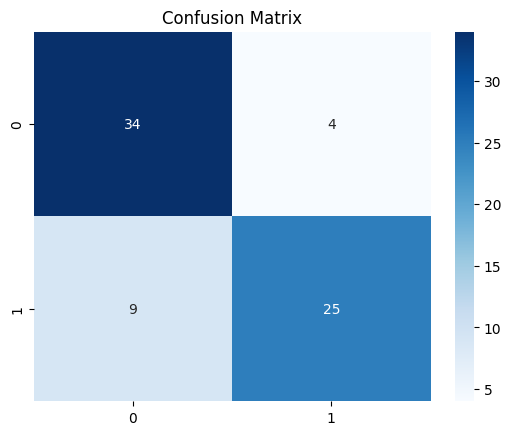

Sensitivity: 0.7353
Specificity: 0.8947
PPV: 0.8621
NPV: 0.7907


In [39]:
plot_confusion_matrix(model, X_test, y_test)

Sensitivity and specificity are not as robust as our training set. The pattern remains the same. Our model is better at confirming true negative heart disease (specificity) than confirming true positives (sensitivity). In other words, our test lacks the sensitivity to pick up positive heart disease and is not suitable for a 'rule-out' test. However, our test can be used as a 'rule-in' test to aid clinicians in diagnosing patients suspected of heart disease. 

#### Conclusion <a class="anchor" id="10th-bullet"></a>

In summary, we have built a logistic regression ML model from the Cleveland Clinic Heart Disease dataset that allows us to classify patients using several predictors.

The results show that:
- Our model has a positive predictive value (PPV) of 86.21% vs negative predictive value (NPV) of 79.07%. This means that a positive prediction of heart disease from our model will correctly predict heart diease in the patients 86.21% of the time whereas a negative prediction will be correct 79.07% of the time.
- The odds for the predictors show highest odds for number of vessels seen by fluoroscopy which is in keeping with the medical knowledge and physiology.

Given that our model include predictors that are expensive and invasive, the utility of our model cost-benefit-wise is limited. For future models, we may want to consider:

> Limiting predictors to those that are inexpensive and easily obtained from patients

> Using different number of predictors in our modelling and evaluating interactions between predictors

> Changing hyperparameters with searchgridcv to optimize our model

> Using a different model